<a href="https://colab.research.google.com/github/LuluW8071/Data-Science/blob/main/Pytorch/08_PyTorch_RNNs/00_PyTorch_RNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch RNNs

RNNs are a class of artificial neural networks that allow previous outputs to be used as inputs while having hidden states. It consists of connections between nodes that can create cycles, allowing information to persist. This structure enables RNNs to exhibit temporal dynamic behavious, making them well suited for tasks that involve sequential data, such as **time series forecasting**, **natural language processing** and **speech recognition**.

<img src="https://easyai.tech/wp-content/uploads/2022/08/f0116-2019-07-02-rnn-1.gif">

RNNs have an **internal state** (memory) that is updated each time step based on the current input and the previous state, enabling them to capture and remember dependencies over time.

>However, this vanilla RNNs often suffer from issues like **vanishing** & **exploding gradients**, making it dfficult for them to learn long term dependencies.

## How RNN differ from Feedforward Neural Network?

Unlike traditional feedforward neural networks, RNNs have recurrent connections, allowing information to persist. Each neuron in the network is not only connected to the next layer but also to itself from the previous time step. This cyclic connection enables the network to capture temporal dependencies in the data.

<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2020/02/assets_-LvBP1svpACTB1R1x_U4_-LwEQnQw8wHRB6_2zYtG_-LwEZT8zd07mLDuaQZwy_image-1.png">

| **Aspect**                | **Feedforward Neural Networks (FNNs)**                                   | **Recurrent Neural Networks (RNNs)**                                                   |
|---------------------------|--------------------------------------------------------------------------|----------------------------------------------------------------------------------------|
| **Direction of Information Flow** | Information flows in one direction, from input nodes to output nodes, in a single pass | Information flows in both directions, allowing feedback loops to capture sequential dependencies |
| **Feedback Connections**  | No feedback connections                                                  | Feedback connections allow the network to maintain an internal state, enabling it to learn from previous outputs |
| **State-Based Representation** | No internal state; only input-output relationships are modeled       | Internal state (or memory) is used to store information, allowing the network to capture long-term dependencies |
| **Sequential Processing** | Processes data in parallel, without considering sequential relationships | Designed to process sequential data, where the output of the previous time step is used as input for the next time step |
| **Training**              | Trains the network to predict the output for a single input              | Trains the network to predict the output for a sequence of inputs, considering the internal state and feedback connections |
| **Applications**          | Suitable for applications like image and speech recognition, where the input can be partitioned into separate, unrelated parts | Well-suited for applications that involve sequential data, such as language translation, speech recognition, and time series forecasting |
| **Complexity**            | Generally simpler to implement and train, with fewer parameters to learn | More complex to implement and train, with many more parameters to learn and the need to manage the internal state |
| **Error Propagation**     | Error is propagated only through the forward pass, without considering the internal state | Error is propagated backwards through time, allowing the network to adjust the internal state and learn from previous mistakes |




### Unfolding in Recurrent Neural Networks (RNNs)

**Unfolding** is a way to visualize and understand how Recurrent Neural Networks (RNNs) process sequential data over time. When we unfold an RNN, we break down its operations into individual time steps, revealing how information flows through the network at each step.

<img src="https://miro.medium.com/v2/resize:fit:1400/1*SKGAqkVVzT6co-sZ29ze-g.png">

#### Key Concepts:

1. **Sequential Processing**:
   - RNNs process input data one time step at a time. At each time step t, the RNN takes the current input x<sub>t</sub> and the hidden state from the previous time step h<sub>t-1</sub>.

2. **Hidden State**:
   - The hidden state h<sub>t</sub> serves as the memory of the network, capturing information from previous inputs. It is updated at each time step based on the current input and the previous hidden state.
   - h<sub>t</sub> = f(W<sub>h</sub> ⋅ h<sub>t-1</sub> + W<sub>x</sub> ⋅ x<sub>t</sub> + b)
   - Here, W<sub>h</sub> and W<sub>x</sub> are weight matrices, b is a bias vector, and f is an activation function (e.g., tanh or ReLU).

3. **Unfolding Process**:
   - When we unfold an RNN, we create a sequence of repeated copies of the network, each corresponding to a different time step. This allows us to see how the network evolves over time.
   - For a sequence of inputs x<sub>1</sub>, x<sub>2</sub>, ..., x<sub>T</sub>, the RNN is unfolded into T time steps, with each step having its own hidden state h<sub>t</sub> and output y<sub>t</sub>.

### [Detailed Explanation on RNNs](https://www.deeplearningbook.org/contents/rnn.html)




## Types of RNNs

Based on the patterns of inputs taken and outputs generated, RNNs can be categorized into five major types:

1. **One to One RNNs (Vanilla Neural Networks):** One-to-one Networks are not actually RNNs but Vanilla Neural Networks which has a single entrance and single exit. These type of RNNs are mainly used for general machine learning problems.
    
2. **One to Many RNNs:** An RNN variant where it takes a single input and generates a sequence of outputs. For example: Image Caption Generator

3. **Many to One RNNs:** An RNN variant where it takes a sequence of inputs and produces a single output. For example: Sentiment Analysis

4. **Many to Many RNNs (Sequence-to-Sequence):** This variant takes a sequence of inputs and produces a sequence of outputs, matching the input sequence's length. For example: Machine Translation.
    
5. **Seq2seq RNNs (Sequence-to-Sequence):** In this architecture, there are two RNNs: an encoder RNN that processes the input sequence and summarizes it into a fixed-size context vector, and a decoder RNN that generates the output sequence based on this context vector. For example: Speech Recognition.

<img src = "../../assets/rnn-types.jpg">


## Backpropagation Through Time

Backpropagation Through Time (BPTT) is a gradient-based optimization algorithm used to train recurrent neural networks (RNNs) and other sequential models. It is an extension of the standard backpropagation algorithm to handle sequences of data.

![Back Propagation Through Time](../../assets/backprop-through-time.jpg)

To compute the gradients of the objective function with respect to all the decomposed model parameters, we can use the chain rule of calculus to propagate gradients through time. The process involves three main steps:

### 1. Forward Pass

During the forward pass, we compute the hidden states and output for each time step using the given equations:

Hidden state at time step t:

$$h_t = activation(W_{hh}h_{t−1} + W_{xh}x_t)$$

Output at time step t:

$$o_t = W_{ho}h_t$$

Where:
- $h_t$ is the hidden state at time step `t`.
- $x_t$ is the input at time step `t`.
- $W_{hh}$ is the weight matrix for the hidden-to-hidden connections.
- $W_{xh}$ is the weight matrix for the input-to-hidden connections.
- $W_{ho}$ is the weight matrix for the hidden-to-output connections.
- `activation` is the identity mapping in this case.

### 2. Loss Computation

After obtaining the output $O_t$ for each time step, we compute the loss $L_t$ at each time stamp using a loss function (not specified in the given equations):

$$L_t = loss(O_t, y_t)$$

Where:
- is the target at time step `t`.

### 3. Backward Pass (BPTT)

The goal of BPTT is to compute the gradients of the objective function with respect to all the model parameters (weights). Starting from the last time step (`T`), we backpropagate the gradients through time by iteratively applying the chain rule.

- Initialize the gradient of the loss with respect to the output at the last time step:

    $$\frac{\partial L_T}{\partial o_T} = \text{gradient of loss}(o_T, y_T)$$

- For each time step t from T to 1:
    - Compute the gradient of the loss with respect to the hidden state:

        $$\frac{\partial L_t}{\partial h_t} = \frac{\partial L_t}{\partial o_t} \cdot \frac{\partial o_t}{\partial h_t} + \frac{\partial L_{t+1}}{\partial h_t} \cdot \frac{\partial h_{t+1}}{\partial h_t}$$

    - Compute the gradients of the loss with respect to the weights:

        $$
        \frac{\partial L_t}{\partial W_{ho}} = \frac{\partial L_t}{\partial o_t} \cdot \frac{\partial o_t}{\partial W_{ho}} \\
        \frac{\partial L_t}{\partial W_{hh}} = \frac{\partial L_t}{\partial h_t} \cdot \frac{\partial h_t}{\partial W_{hh}} \\
        \frac{\partial L_t}{\partial W_{xh}} = \frac{\partial L_t}{\partial h_t} \cdot \frac{\partial h_t}{\partial W_{xh}}
        $$

    - Update the gradient of the loss with respect to the output of the previous time step:

        $$\frac{\partial L_{t-1}}{\partial o_{t-1}} = \frac{\partial L_t}{\partial h_t} \cdot \frac{\partial h_t}{\partial o_{t-1}}$$

After computing the gradients for all time steps, we can update the model parameters using an optimization algorithm (e.g., stochastic gradient descent) to minimize the objective function.

The computational graph, shown in the figure above, helps visualize the dependencies among model variables and parameters during the computation of the RNN. Each node in the graph represents a variable, and each edge represents a computation involving those variables. The graph helps in understanding how gradients flow through the network during backpropagation through time.

### 0. Import Libraries

In [111]:
# Importing libraries
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Setting up device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

### 1. Download Datasets

In [112]:
# Download dataset
!gdown https://drive.google.com/uc?id=1eL4Hxm6NMcR6dCwuGDSPmVi-4BkUGKDz

Downloading...
From: https://drive.google.com/uc?id=1eL4Hxm6NMcR6dCwuGDSPmVi-4BkUGKDz
To: /content/language_data.zip
100% 2.88M/2.88M [00:00<00:00, 93.4MB/s]


In [113]:
import zipfile

# Extract zip data
with zipfile.ZipFile('language_data.zip', 'r') as zip_ref:
    zip_ref.extractall('/content')

### 2. Prepare Datasets

In [114]:
import os
import io
import unicodedata, string, glob
import random

# alphabet small + capital letters + ".,;'"
ALL_LETTERS = string.ascii_letters + ".,;'"

# Turn a unicode string to plain ASCII
def unicode_to_ascii(s):
  return ''.join(
      c for c in unicodedata.normalize('NFD', s)
      if unicodedata.category(c) != 'Mn'
      and c in ALL_LETTERS
  )

def load_data(path):
  # Build the category_lines in dictionary, a list of names per lanaguge
  category_lines = {}
  all_categories = []

  def find_files(path):
    return glob.glob(path)

  # print(find_files(path))

  # Read a file and split into lines
  def read_lines(filename):
    lines = io.open(filename, encoding='utf-8').read().strip().split('\n')
    return [unicode_to_ascii(line) for line in lines]

  for filename in find_files(path):
    category = os.path.splitext(os.path.basename(filename))[0]
    all_categories.append(category)
    lines = read_lines(filename)
    category_lines[category] = lines

  return category_lines, all_categories

### One-Hot-Encoding

One-hot encoding is a technique used in machine learning to represent categorical data numerically. Each category is represented by a binary vector where only one bit is hot (1) while all others are cold (0), indicating the presence or absence of that category.

<img src = "https://miro.medium.com/v2/resize:fit:2000/1*e70626LPGPlViXMDemmqRQ.png">

Simply, it is a one-hot vector which is filled with 0s except for a 1 at index of a current letter.


In [115]:
N_LETTERS = len(ALL_LETTERS)

# Find letter index from all_letters
def letter_to_index(letter):
  return ALL_LETTERS.find(letter)

# Turn a letter into <1 x n_letters> Tensor
def letter_to_tensor(letter):
  tensor = torch.zeros(1, N_LETTERS)
  tensor[0][letter_to_index(letter)] = 1
  return tensor

# Turn a line into a <line_length x 1 x n_letters>
# or an array of one-hot letter vectors [One-Hot_Encoding]
def line_to_tensor(line):
  tensor = torch.zeros(len(line), 1, N_LETTERS)
  for i, letter in enumerate(line):
    tensor[i][0][letter_to_index(letter)] = 1
  return tensor

In [116]:
# Display results of above functions
text = ['Dépatouiller',                             # French
        'Dampfschifffahrtsgesellschaftskapitän',    # German
        'Kōfuku']                                   # Japanese

print(ALL_LETTERS, '\n')

for sample in text:
  print(unicode_to_ascii(sample))    # Removes dialect symbols in words

abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ.,;' 

Depatouiller
Dampfschifffahrtsgesellschaftskapitan
Kofuku


In [117]:
# Accessing file contents
path = 'data/names/*.txt'

# Setting up dataloaders
category_lines, all_categories = load_data(path)
n_categories = len(all_categories)

print('Total languages:', n_categories)

print(category_lines['Japanese'][:5])

# Tensor Mapping after One-Hot-Encoding
print(letter_to_index('A'))
print(letter_to_tensor('A'))

print(line_to_tensor('PyTorch'))
print(line_to_tensor('PyTorch').shape)

Total languages: 18
['Abe', 'Abukara', 'Adachi', 'Aida', 'Aihara']
26
tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.]])
tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [118]:
def random_training_example(category_lines, all_categories):
  def random_choice(a):
    random_idx = random.randint(0, len(a)-1)
    return a[random_idx]

  category = random_choice(all_categories)
  line = random_choice(category_lines[category])
  category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long)
  line_tensor = line_to_tensor(line)

  return category, line, category_tensor, line_tensor

### 3. Building RNN

Here, RNN module implements a “vanilla RNN” which is just 3 linear layers which operate on an input and hidden state, with a `LogSoftmax` layer after the output.

<img src = "https://miro.medium.com/v2/resize:fit:640/format:webp/1*1yCiqoUkgkih4FVNR692tg.png" >

In [119]:
class RNN(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(RNN, self).__init__()

    self.hidden_size = hidden_size
    self.i2h = nn.Linear(input_size+hidden_size, hidden_size)
    self.i2o = nn.Linear(input_size+hidden_size, output_size)
    self.softmax = nn.LogSoftmax(dim=1)

  def forward(self, input_tensor, hidden_tensor):
    combined = torch.cat((input_tensor, hidden_tensor), 1)

    hidden = self.i2h(combined)
    output = self.softmax(self.i2o(combined))
    return output, hidden

  def init_hidden(self):
    return torch.zeros(1, self.hidden_size)

In [120]:
model = RNN(input_size=N_LETTERS, hidden_size=128, output_size=n_categories).to(device)
model

RNN(
  (i2h): Linear(in_features=184, out_features=128, bias=True)
  (i2o): Linear(in_features=184, out_features=18, bias=True)
  (softmax): LogSoftmax(dim=1)
)

In [121]:
# Passing an example to check the model
input_tensor = letter_to_tensor('A').to(device)
hidden_tensor = model.init_hidden().to(device)

output, next_hidden = model(input_tensor, hidden_tensor)
output, next_hidden

(tensor([[-2.8790, -2.8840, -2.8008, -2.9885, -2.7753, -2.9500, -2.8259, -2.8036,
          -3.0092, -2.8656, -2.8372, -2.8963, -2.8977, -2.9712, -2.8446, -2.8831,
          -3.0300, -2.9312]], grad_fn=<LogSoftmaxBackward0>),
 tensor([[ 0.0256,  0.0240,  0.0370,  0.0370, -0.0696, -0.0437, -0.1273, -0.0991,
          -0.0394, -0.0933,  0.0018, -0.0798, -0.1245,  0.0935,  0.0600, -0.0828,
          -0.0246,  0.0077,  0.1136, -0.0244, -0.0663,  0.0232,  0.0747,  0.0132,
           0.0330,  0.0019, -0.0913, -0.0382, -0.0253,  0.0135,  0.0306, -0.0586,
          -0.0588, -0.0789, -0.1291,  0.0269, -0.0725, -0.0176, -0.0599,  0.0142,
           0.0673,  0.0706, -0.0238,  0.0023, -0.0647,  0.0979, -0.0263,  0.0477,
           0.0477,  0.0345, -0.0301,  0.0480, -0.0575,  0.0138,  0.0119, -0.0448,
          -0.0860,  0.0061, -0.0016,  0.0680,  0.0761,  0.1179, -0.0543, -0.0105,
           0.1333,  0.0279, -0.0666,  0.0782, -0.0558, -0.0114,  0.0221,  0.0296,
           0.0865, -0.0977,  0.0396,

In [122]:
# Passing whole sequence as example
input_tensor = line_to_tensor('PyTorch').to(device)
hidden_tensor = model.init_hidden().to(device)

output, next_hidden = model(input_tensor[0], hidden_tensor)
output.shape, next_hidden.shape

(torch.Size([1, 18]), torch.Size([1, 128]))

In [123]:
def category_from_output(output):
  top_n, top_i = output.topk(1)
  category_i = top_i[0].item()
  return all_categories[category_i], category_i

category_from_output(output)

('Russian', 6)

### 4. Train RNN

In [124]:
# Setting up loss function and optimizier
loss_fn = nn.NLLLoss()
optimizer = torch.optim.SGD(model.parameters(),
                            lr=5e-3) # If you set this too high, it might explode. If too low, it might not learn

In [125]:
def train(line_tensor, category_tensor, device):
  hidden = model.init_hidden().to(device)
  for i in range(line_tensor.size()[0]):
    output, hidden = model(line_tensor[i], hidden)

  loss = loss_fn(output, category_tensor)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  return output, loss.item()

In [126]:
from tqdm.auto import tqdm

current_loss = 0
all_losses = []
plot_steps, print_steps = 500, 5000
n_iters = 10000 * 15

for i in tqdm(range(n_iters)):
  category, line, category_tensor, line_tensor = random_training_example(category_lines, all_categories)
  line_tensor = line_tensor.to(device)
  category_tensor = category_tensor.to(device)

  output, loss = train(line_tensor, category_tensor, device)
  current_loss += loss

  if (i+1) % plot_steps == 0:
    all_losses.append(current_loss / plot_steps)    # append avg. losses
    current_loss = 0

    if (i+1) % print_steps == 0:
      guess, guess_i = category_from_output(output)
      correct = '✓' if guess == category else '✗ (%s)' % category
      print(f'Loss: {loss:.4f} {line} / {guess} ---- {correct}')

  0%|          | 0/150000 [00:00<?, ?it/s]

Loss: 2.3355 Hung / Chinese ---- ✗ (Korean)
Loss: 0.6872 Kaloxylos / Greek ---- ✓
Loss: 1.5481 Schneijder / Dutch ---- ✓
Loss: 1.0657 Xie / Korean ---- ✗ (Chinese)
Loss: 2.7167 Crawford / French ---- ✗ (Scottish)
Loss: 1.5263 Macclelland / Italian ---- ✗ (Irish)
Loss: 3.3514 Nova / Japanese ---- ✗ (English)
Loss: 1.1593 Zha / Chinese ---- ✓
Loss: 0.2120 Tsukada / Japanese ---- ✓
Loss: 2.0544 Winograd / Czech ---- ✗ (Polish)
Loss: 2.2519 Ngai / Chinese ---- ✗ (Korean)
Loss: 0.9765 Kosmas / Greek ---- ✓
Loss: 2.4148 Hughes / Chinese ---- ✗ (Scottish)
Loss: 0.2737 Kawate / Japanese ---- ✓
Loss: 1.2411 Caito / Portuguese ---- ✗ (Italian)
Loss: 0.3523 Louverdis / Greek ---- ✓
Loss: 0.6771 Campos / Portuguese ---- ✓
Loss: 3.0076 Ventura / Czech ---- ✗ (Italian)
Loss: 1.1441 Cheng / Korean ---- ✗ (Chinese)
Loss: 2.9447 Aalst / Arabic ---- ✗ (Dutch)
Loss: 3.6711 Ross / Greek ---- ✗ (Scottish)
Loss: 2.1548 Lowe / Japanese ---- ✗ (German)
Loss: 2.3417 Jeffreys / Dutch ---- ✗ (English)
Loss: 1.17

### 5. Plot Loss curves

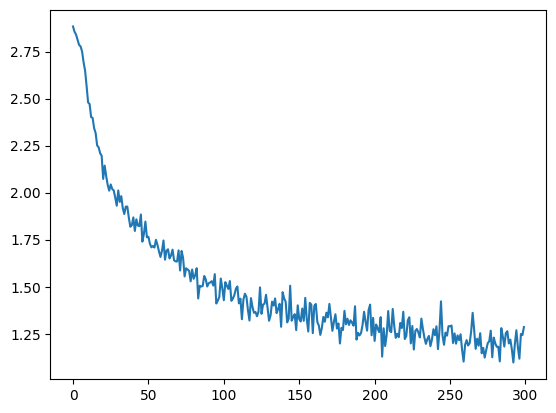

In [127]:
plt.figure()
plt.plot(all_losses)
plt.show()

### 6. Save Model

In [128]:
from pathlib import Path

def save_model(model, target_dir, model_name):
    # Create target directory
    target_dir_path = Path(target_dir)
    target_dir_path.mkdir(parents=True,
                            exist_ok=True)

    # Create model save path
    assert model_name.endswith(".pth") or model_name.endswith(".pt"), "model_name should end with '.pt' or '.pth'"
    model_save_path = target_dir_path / model_name

    # Save the model state_dict()
    print(f"[INFO] Saving model to: {model_save_path}")
    torch.save(obj=model.state_dict(),
                f=model_save_path)

In [129]:
save_model(model, '/content/models/', 'language.pt')

[INFO] Saving model to: /content/models/language.pt


### 7. Load Model to cpu

In [130]:
MODEL_SAVE_PATH = "/content/models/language.pt"
model_info = torch.load(MODEL_SAVE_PATH, map_location=torch.device('cpu'))
model.load_state_dict(model_info)

model.eval()

RNN(
  (i2h): Linear(in_features=184, out_features=128, bias=True)
  (i2o): Linear(in_features=184, out_features=18, bias=True)
  (softmax): LogSoftmax(dim=1)
)

### 8. Predict

In [131]:
def predict(model, input_line):
  with torch.inference_mode():
    line_tensor = line_to_tensor(input_line)
    hidden = model.init_hidden()

    for i in range(line_tensor.size()[0]):
      output, hidden = model(line_tensor[i], hidden)

    guess = category_from_output(output)
    print(f"Word: {input_line} \t Langauge: {guess}\n")

In [132]:
words = ['Chang', 'Xiao',      # Chinese
         'Albert', 'Lawrence', # English
         'Rhee', 'hwang',      # Korean
         'Akiyama', 'Ariyama', # Japanese
         'Abbakumovsky']       # Russian

for word in words:
  predict(model, word)

Word: Chang 	 Langauge: ('Vietnamese', 2)

Word: Xiao 	 Langauge: ('Chinese', 8)

Word: Albert 	 Langauge: ('French', 10)

Word: Lawrence 	 Langauge: ('German', 16)

Word: Rhee 	 Langauge: ('Chinese', 8)

Word: hwang 	 Langauge: ('Korean', 14)

Word: Akiyama 	 Langauge: ('Japanese', 17)

Word: Ariyama 	 Langauge: ('Japanese', 17)

Word: Abbakumovsky 	 Langauge: ('Russian', 6)



### 9. Plot Confusion Matrix

In [133]:
import matplotlib.ticker as ticker

# Keep track of correct guesses in a confusion matrix
confusion = torch.zeros(n_categories, n_categories)
n_confusion = 10000

# Just return an output given a line
def evaluate(line_tensor):
    hidden = model.init_hidden()

    for i in range(line_tensor.size()[0]):
        output, hidden = model(line_tensor[i], hidden)

    return output

# Go through a bunch of examples and record which are correctly guessed
for i in tqdm(range(n_confusion)):
    category, line, category_tensor, line_tensor = random_training_example(category_lines, all_categories)
    output = evaluate(line_tensor)
    guess, guess_i = category_from_output(output)
    category_i = all_categories.index(category)
    confusion[category_i][guess_i] += 1

# Normalize by dividing every row by its sum
for i in range(n_categories):
    confusion[i] = confusion[i] / confusion[i].sum()

  0%|          | 0/10000 [00:00<?, ?it/s]

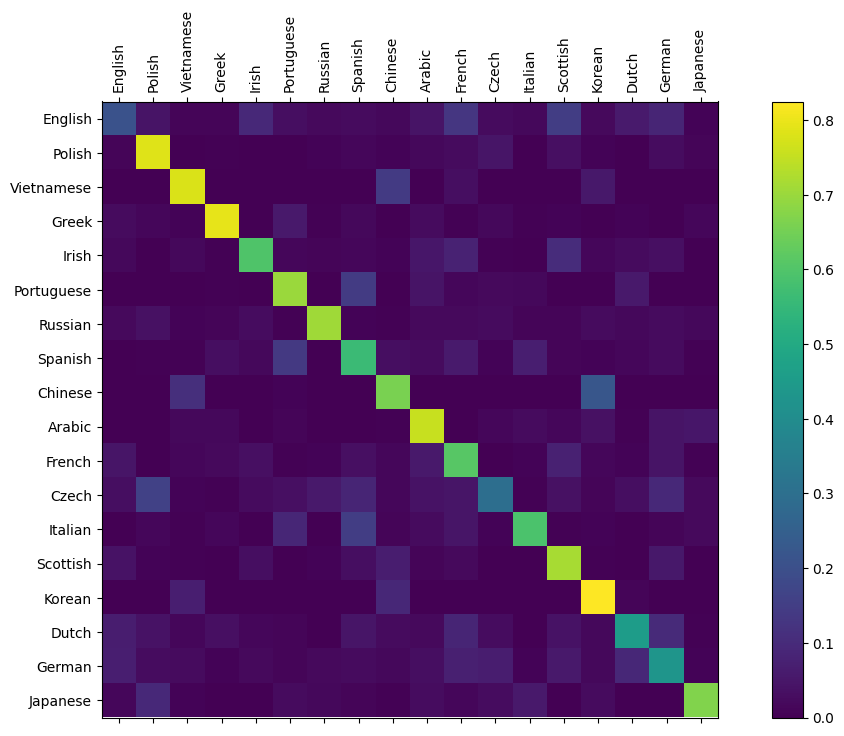

In [134]:
# Set up plot
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111)
cax = ax.matshow(confusion.numpy())
fig.colorbar(cax)

# Set up axes
ax.set_xticks(range(n_categories))
ax.set_yticks(range(n_categories))
ax.set_xticklabels(all_categories, rotation=90)
ax.set_yticklabels(all_categories)

# Force label at every tick
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

# sphinx_gallery_thumbnail_number = 2
plt.show()